In [4]:
!pip install statsmodels
!pip install scikit-learn



In [5]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt



In [6]:
#load dataset
new_df=pd.read_csv('C:/classisificatn and regressin/daily-min-temperatures.csv' ,header=0,index_col=0,parse_dates=True)

In [7]:
#view loaded dataset
new_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [8]:
#split dataset
X=new_df.values
new_train,new_test=X[1:len(X)-7],X[len(X)-7:] # the training dataset Contains data from index1 to the last seven datasets and the test data sets Contains data from only the last 7datasets 

In [9]:
#train autoregression
ARmodel=AutoReg(new_train,lags=29)#The AR model uses the previous 29 data points to predict future values
ARmodel_fit=ARmodel.fit()#The fit() method estimates the influence of those 29 previous time points.
print('Coefficients:%s' %ARmodel_fit.params)#The params attribute contains the coefficients that describe the relationship between the current value and the 29 previous values.

Coefficients:[ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


In [16]:
#Make predictions
new_predictions=ARmodel_fit.predict(start=len(new_train),end=len(new_train)+len(new_test)-1,dynamic=False)
# Use the fitted AR model to predict values starting from the end of the training set and ends after the length of the test data.
# The predictions cover the length of the test data.
# dynamic=False means the model makes predictions based on actual historical values, not prior predictions.

for i in range(len(new_predictions)):# Loop through the predicted values and print each one alongside the corresponding actual test value.   
 print('predicted%f,expected%f' % (new_predictions[i].item(),new_test[i].item()))  # Use .item() to extract the scalar value from the NumPy array elements
rmse=sqrt(mean_squared_error(new_test,new_predictions))# Calculate the Root Mean Squared Error (RMSE) to assess how well the model's predictions match the actual values.
print('test Rmse:%.3F'%rmse)# Print the RMSE value with three decimal places to show the accuracy of the predictions.

predicted11.871275,expected12.900000
predicted13.053794,expected14.600000
predicted13.532591,expected14.000000
predicted13.243126,expected13.600000
predicted13.091438,expected13.500000
predicted13.146989,expected15.700000
predicted13.176153,expected13.000000
test Rmse:1.225


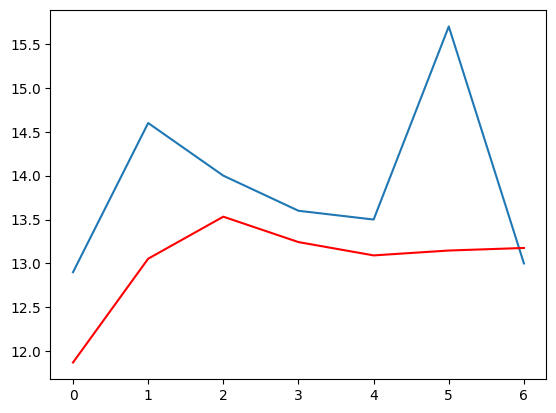

In [13]:
#plot results
pyplot.plot (new_test)
pyplot.plot (new_predictions,color='red')

In [14]:
#create and evaluate an updated autoregressive model
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt


In [17]:
#load dataset
new_df=pd.read_csv('C:/classisificatn and regressin/daily-min-temperatures.csv' ,header=0,index_col=0,parse_dates=True)

In [18]:
#split dataset
X=new_df.values
new_train,new_test=X[1:len(X)-7],X[len(X)-7:] # the training dataset Contains data from index1 to the last seven datasets and the test data sets Contains data from only the last 7datasets 

In [19]:
#train Autoregression
lag_window=29
ARmodel=AutoReg(new_train,lags=29)#The AR model uses the previous 29 data points to predict future values
ARmodel_fit=ARmodel.fit()#The fit() method estimates the influence of those 29 previous time points.
coef=ARmodel_fit.params 


In [22]:
#walk forward over time steps in test
history=new_train[len(new_train)-lag_window:]# This extracts the last 'lag_window' number of data points from 'new_train'.
history=[history[i] for i in range(len(history))]# It loops through each element in 'history' and stores them in a new list.
new_predictions=list()# Initializes an empty list called 'new_predictions'.



In [34]:
for t in range(len(new_test)):  
    # Loop through each element in the test data (new_test). 't' is the index for the test dataset.
    length = len(history)  
    # Get the current length of 'history', which stores past observations (both training data and predictions).
    lag = [history[i] for i in range(length - lag_window, length)]  
    # Create the 'lag' list that contains the most recent 'lag_window' number of data points from 'history'.
    # 'lag_window' is the number of previous data points (lags) used for prediction.
    yhat = coef[0]  
    # Initialize 'yhat', the predicted value. Start with the intercept (coef[0]), the base prediction before adding lag terms.
    for d in range(lag_window):  
        # Loop through each of the lag terms, iterating from 0 to 'lag_window-1'. 
     yhat += coef[d + 1] * lag[lag_window - d - 1]  
        # For each lag, update 'yhat' by adding the coefficient (coef[d+1]) multiplied by the corresponding lag value.
        # 'lag[lag_window - d - 1]' accesses the lagged data in reverse order, matching the AR model's logic.
    obs = new_test[t]  
    # Get the actual observation (ground truth) from the test dataset for the current index 't'.
    new_predictions.append(yhat)  
    # Append the predicted value 'yhat' to the list of predictions ('new_predictions').
    history.append(obs)  
    # Add the actual observed value ('obs') to 'history' for future predictions. This updates the history with the latest data point.
print('predicted=%f, expected=%f' % (yhat, obs))  
# After the loop, print the final predicted value 'yhat' and the corresponding actual test value 'obs'.

    
    


predicted=14.816416, expected=13.000000


C:\Users\maina\AppData\Local\Temp\ipykernel_1912\2761674901.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


In [35]:
# Ensure new_predictions and new_test have the same length
min_length = min(len(new_test), len(new_predictions))
new_test_trimmed = new_test[:min_length]
new_predictions_trimmed = new_predictions[:min_length]

# Now calculate RMSE with trimmed arrays
rmse = sqrt(mean_squared_error(new_test_trimmed, new_predictions_trimmed))
print('Test RMSE: %.3F' % rmse)
#the second RMSE from walk-forward validation is usually more realistic and often higher than the first RMSE


Test RMSE: 1.204


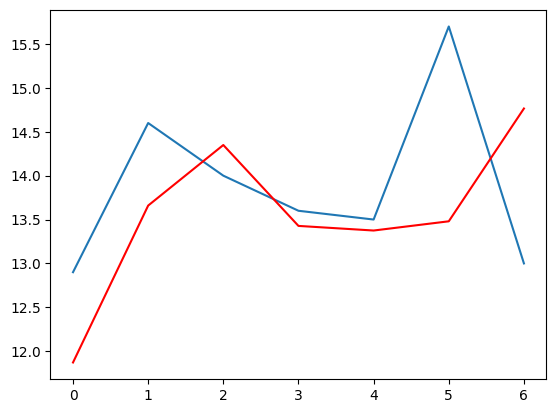

In [26]:
pyplot.plot (new_test)
pyplot.plot (new_predictions,color='red')
pyplot.show()